In [62]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

There are many `?` in the dataframe stands for NA. Change it to NA and drop the corresponding rows.

In [2]:
auto = pd.read_csv('../../data_set/Auto.csv', na_values='?');

In [3]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
auto = auto.dropna()

Perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor.

The codes below generate predictor matrix `X`.

In [5]:
horsepower = MS(['horsepower']);
X = horsepower.fit_transform(auto);
X[:5]

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0


In [6]:
y = auto['mpg']
y[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [7]:
y = auto['mpg'];
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [8]:
new_df = pd.DataFrame({'horsepower': [98]});
newX = horsepower.fit_transform(new_df);
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([24.46707715])

In [9]:
new_predictions.conf_int(alpha = 0.05)

array([[23.97307896, 24.96107534]])

In [10]:
def draw_line(ax, b, k, *args, **kwargs):
    # add a line with slope k and intercept b to axis ax
    xlim = ax.get_xlim()
    ylim = [k * xlim[0] + b, k * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

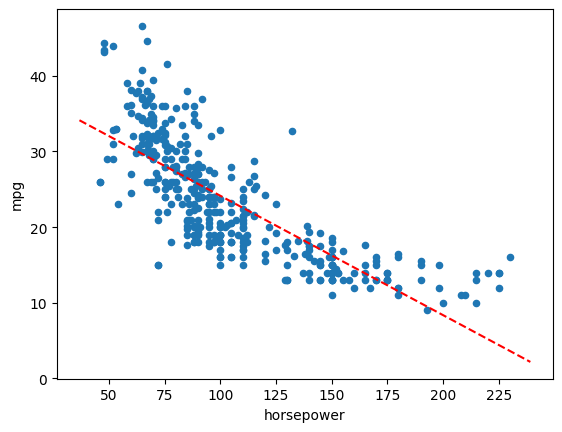

In [11]:
ax = auto.plot('horsepower', 'mpg', 'scatter')
draw_line(ax, results.params[0], results.params[1], 'r--')

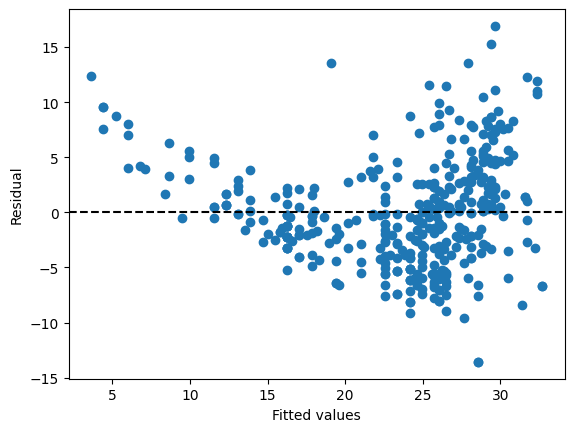

In [12]:
ax = plt.subplots()[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values');
ax.set_ylabel('Residual');
ax.axhline(0, c = 'k', ls = '--')

Text(0, 0.5, 'Leverage')

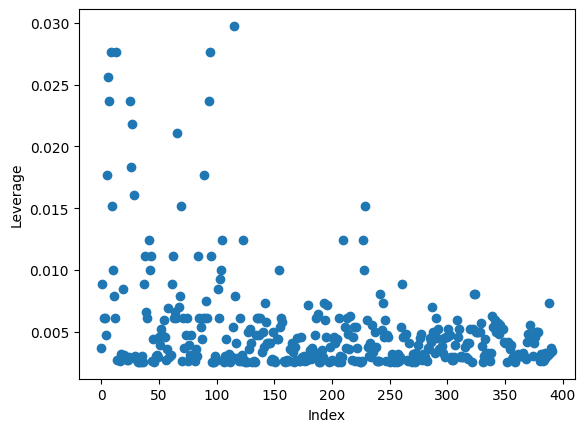

In [13]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

C:\Users\yxu148\AppData\Local\Temp\ipykernel_44356\3878605884.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(auto, ax=ax);


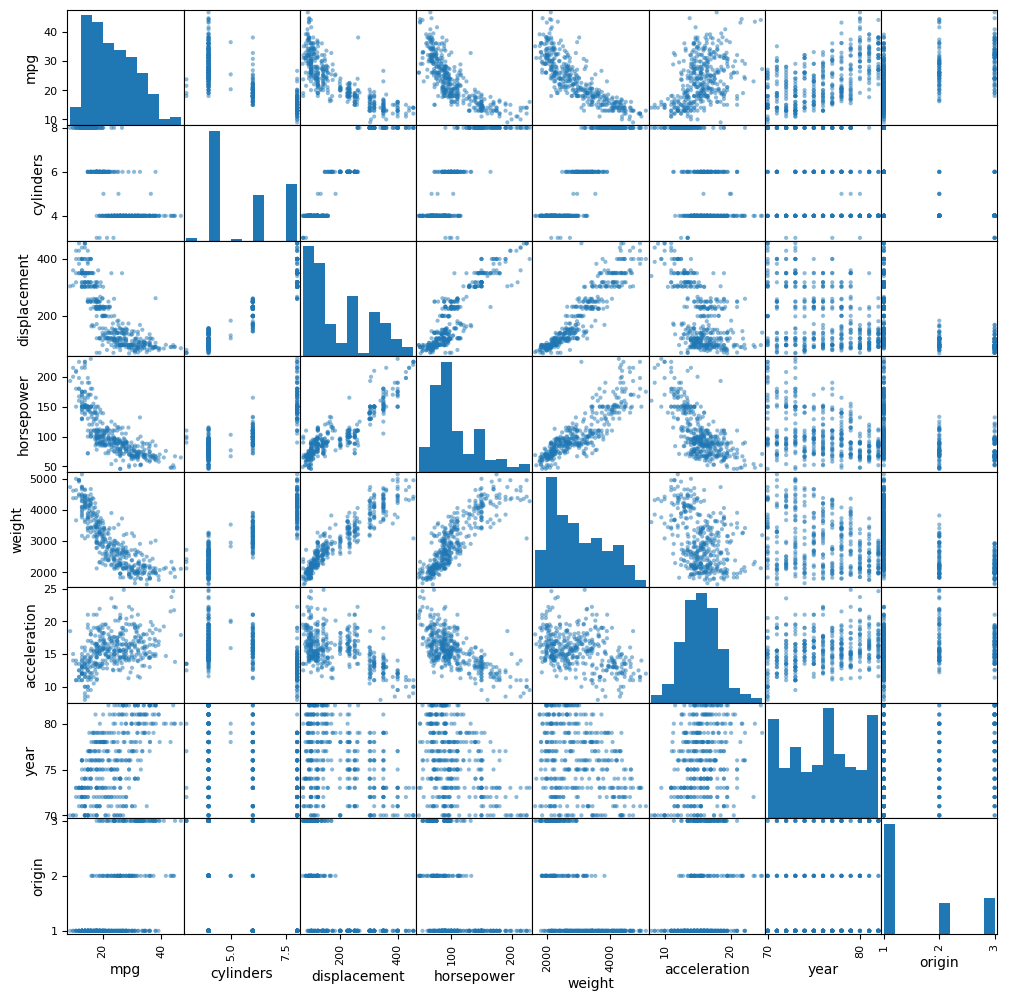

In [19]:
ax = plt.subplots(figsize=(12,12))[1]
pd.plotting.scatter_matrix(auto, ax=ax);

In [22]:
auto.corr(method='pearson', numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [48]:
x_columns = auto.columns.drop(['name', 'mpg'])
y_multi = auto['mpg'];
X_multi = MS(x_columns).fit_transform(auto);
model_multi = sm.OLS(y_multi, X_multi)
results_multi = model_multi.fit()
summarize(results_multi)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


If the Variance inflation factor (VIF) is larger than 5, it is suggested that the variable adds a big variance to the regression model.

In [63]:
vals = [VIF(X_multi, i) for i in range(1, X_multi.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X_multi.columns[1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


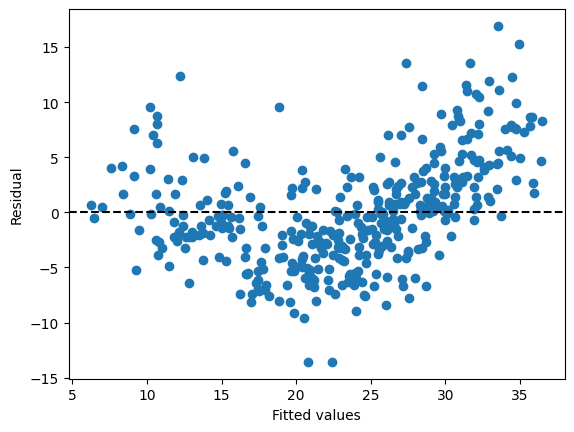

In [60]:
ax = plt.subplots()[1]
ax.scatter(results_multi.fittedvalues, results.resid)
ax.set_xlabel('Fitted values');
ax.set_ylabel('Residual');
ax.axhline(0, c = 'k', ls = '--')

Text(0, 0.5, 'Leverage')

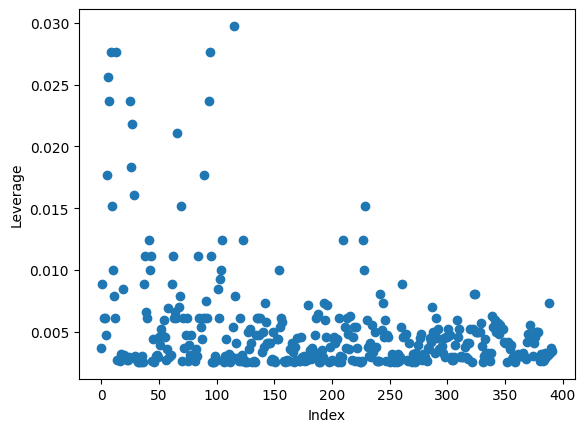

In [61]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

In [124]:
x_list = auto.columns.values.tolist()
x_list.remove('name')  # it has to be removed one by one
x_list.remove('mpg')
x_list.remove('displacement')
# x_list.remove('weight')
x_list.append(('acceleration', 'horsepower'))  # interaction term
x_list.append(poly('displacement', degree=2))  # non-linear term, x^2
x_list

['mpg',
 'cylinders',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 ('acceleration', 'horsepower'),
 Feature(variables=('displacement',), name='poly(displacement, degree=2)', encoder=Poly(degree=2), use_transform=True, pure_columns=False, override_encoder_colnames=True)]

In [125]:
y_inter = auto['mpg'];
X_inter = MS(x_list).fit_transform(auto);
model_inter = sm.OLS(y_inter, X_inter)
results_inter = model_inter.fit()
summarize(results_inter)

,coef,std err,t,P>|t|
intercept,2.497000e-12,3.800000e-12,6.580000e-01,0.511
mpg,1.000000e+00,3.490000e-14,2.860000e+13,0.000
cylinders,-1.299000e-14,2.180000e-13,-6.000000e-02,0.953
horsepower,8.604000e-16,2.000000e-14,4.300000e-02,0.966
weight,2.147000e-15,4.820000e-16,4.454000e+00,0.000
acceleration,-1.332000e-15,1.220000e-13,-1.100000e-02,0.991
year,-8.327000e-17,4.100000e-14,-2.000000e-03,0.998
origin,1.665000e-16,1.860000e-13,1.000000e-03,0.999
acceleration:horsepower,-4.244000e-15,1.360000e-15,-3.114000e+00,0.002
"poly(displacement, degree=2)[0]",7.105000e-14,1.110000e-11,6.000000e-03,0.995


In [116]:
vals = [VIF(X_inter, i) for i in range(1, X_inter.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X_inter.columns[1:])
vif

,vif
cylinders,12.843243
horsepower,55.964888
weight,14.760615
acceleration,10.594490
year,1.245840
origin,2.108864
acceleration:horsepower,26.771851
"poly(displacement, degree=2)[0]",29.461437
"poly(displacement, degree=2)[1]",2.574295


In [119]:
X_inter

,intercept,cylinders,horsepower,weight,acceleration,year,origin,acceleration:horsepower,"poly(displacement, degree=2)[0]","poly(displacement, degree=2)[1]"
0,1.0,8,130.0,3504,12.0,70,1,1560.0,0.054411,-0.035077
1,1.0,8,165.0,3693,11.5,70,1,1897.5,0.075192,0.010404
2,1.0,8,150.0,3436,11.0,70,1,1650.0,0.059727,-0.025350
3,1.0,8,150.0,3433,12.0,70,1,1800.0,0.052962,-0.037502
4,1.0,8,140.0,3449,10.5,70,1,1470.0,0.051995,-0.039065
...,...,...,...,...,...,...,...,...,...,...
392,1.0,4,86.0,2790,15.6,82,1,1341.6,-0.026296,-0.021612
393,1.0,4,52.0,2130,24.6,82,2,1279.2,-0.047077,0.030804
394,1.0,4,84.0,2295,11.6,82,1,974.4,-0.028713,-0.016547
395,1.0,4,79.0,2625,18.6,82,1,1469.4,-0.035962,0.000274


C:\Users\yxu148\AppData\Local\Temp\ipykernel_44356\1492503927.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(X_inter, ax=ax);
D:\Apps-SU\miniconda3\envs\statlearn\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
D:\Apps-SU\miniconda3\envs\statlearn\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\Apps-SU\miniconda3\envs\statlearn\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\Apps-SU\miniconda3\envs\statlearn\lib\site-packa

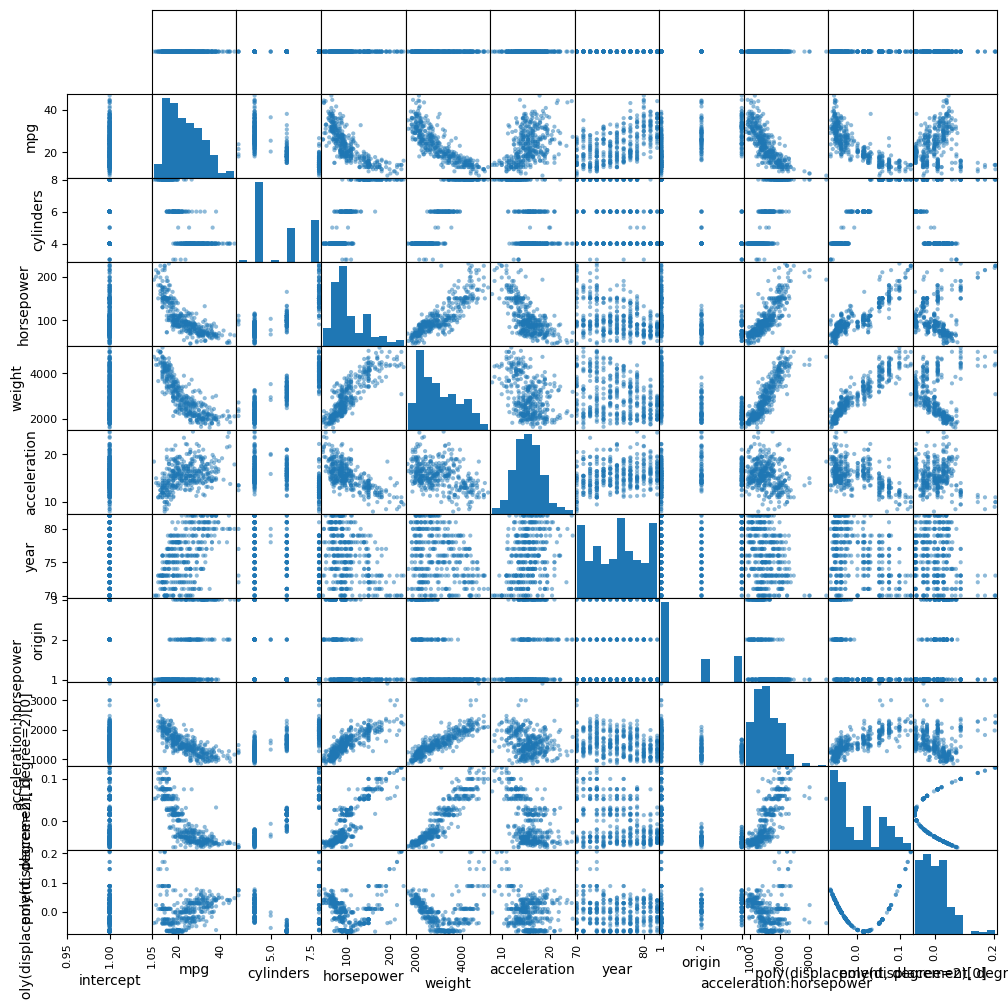